# Linear Regression
Linear regression is a statistical method that models a relationship between s dependent variables and one or more independant variables

**One independant variable**

`y = mx + c` where `y` can be house prices and `x` can be house size

**Multiple independant variables**

`y = w1x1 + w2x2 .... + w6x6 + b` where `y` is the house prices, `x1, x2..` are features like house size, number of bedrooms and distance to city center, and `w1,w2...` are weights which determine the influence of each feature and `b` is the bias, which adjusts the baseline prediction (shifts up or down without changing slope)

## Cost Function (MSE - cost function)
Minimise MSE to get the best weight and bias

$$
MSE = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2
$$

Where,

$ N $ is the number of data points,

$ y_i $ is the actual value we are trying to predict,i.e, the target variable,

$ hat{y}_i $ is the predicted value from the regression equation

MSE measures how far the predictions are from actual values. A smaller MSE means a better fit.

### Side Note
New terms I learnt were loss function, cost function, and objective function
* **Loss function** is defined on data point, prediction and label and measures the penalty (Squared loss, hinge loss, 0/1 loss)

* **Cost function** is a bit more general, it is a sum of loss functions over your training set plus some model complexity penalty (regularization) (MSE, SVM cost function)

* **Objective function** is the most general term for any function that is optimized during training


## Gradient Descent Optimation (MSE reductions)
This is an iterative algo that updates weight to minimize loss

$$
w_j = w_j - {\alpha} \frac{\partial MSE}{\partial w_j}
$$

and for bias,

$$
b = b - {\alpha} \frac{\partial MSE}{\partial b}
$$

where $ {\alpha} $ is the learning rate, and the partial function is the gradient of the cost function.

Gradient descent moves downhill in the cost function to find the optimal weight and bias (local minimum)

## Calculating the Gradient partial

For biases,

$$
\frac{\partial MSE}{\partial b} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)
$$

For weights,

$$
\frac{\partial MSE}{\partial w_j} = \frac{-2}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y}_i)
$$

Here $\hat{y}_i$ is equal to ${x_i}{W} + {b}$


## Implementation

Possible functions include, cost_function(), compute_gradients() (the partial derivative), grad_desc() and a predict() for fitting

In [151]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [231]:
#Generate random data
X_data, y_points = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=2)
# X1, y1 = datasets.make_regression(n_samples=100, n_features=1, noise=15, random_state=2)

### Implementation without batching

In [160]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.biases = None

    def cost_function(self,y, y_pred):
        m = len(y)
        return (1 / 2) * np.mean((y_pred - y) ** 2) # for a single data point, will be used in a loop to iterate over all points. Instead of 1/n, i used mean()
    
    def compute_grad(self, X, y, y_pred):
        error = y_pred - y

        db = (1/len(y)) *  np.mean(error) # np.mean handles over N samples, can substitute with len(X).  In practice, we divide MSE by 2 to simplify the gradient, and that’s why the negative disappears in the code
        dW = (1/len(y)) *  np.dot(X.T, error) # Transpose X to fit vector of error

        return db, dW
        
    def grad_desc(self, X, y):
        cost_func = []
        self.weights = np.zeros(X.shape[1])  # If X has shape (N, d), initialize weights as a vector of size d which is features
        self.biases = 0  
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.biases # get y_pred first
            cost = self.cost_function(y, y_pred)
            cost_func.append(cost)
            dB, dW = self.compute_grad(X, y, y_pred)
            self.weights = self.weights - self.learning_rate * dW
            self.biases = self.biases - self.learning_rate * dB
            if epoch % 2 == 0:
                print(f"Epoch {epoch}/{self.epochs}, Cost: {cost}")
        return self.weights, self.biases, cost_func

    def predict(self, X):
        return np.dot(X,self.weights) + self.biases

### Implementation with batching

In [ ]:
class LinearRegression_batch:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = None
        self.biases = None

    def cost_function(self,y, y_pred):
        m = len(y)
        return (1 / 2) * np.mean((y_pred - y) ** 2) # for a single data point, will be used in a loop to iterate over all points. Instead of 1/n, i used mean()
    
    def compute_grad(self, X, y, y_pred):
        error = y_pred - y

        db = (1/len(y)) *  np.mean(error) # np.mean handles over N samples, can substitute with len(X).  In practice, we divide MSE by 2 to simplify the gradient, and that’s why the negative disappears in the code
        dW = (1/len(y)) *  np.dot(X.T, error) # Transpose X to fit vector of error

        return db, dW
        
    def grad_desc(self, X, y):
        cost_func = []
        self.weights = np.zeros(X.shape[1])  # If X has shape (N, d), initialize weights as a vector of size d which is features
        self.biases = 0  

        for epoch in range(self.epochs):
            idx = np.random.permutation(X.shape[0]) # create permutations of indices so that dataset can be shuffled
            X, y = X[idx], y[idx]

            for i in range(0, X.shape[0], self.batch_size): # in every epoch, iterate through sample size, every batch_size amount
                X_batch = X[i: i+self.batch_size] # from ith position, over the range of batch size, to get batches
                y_batch = y[i: i+self.batch_size]

                y_pred = np.dot(X_batch, self.weights) + self.biases # get y_pred first
                cost = self.cost_function(y_batch, y_pred)

                dB, dW = self.compute_grad(X_batch, y_batch, y_pred)
                self.weights = self.weights - self.learning_rate * dW
                self.biases = self.biases - self.learning_rate * dB
            cost_func.append(cost) # append value at the end of every batch
            if epoch % 2 == 0:
                print(f"Epoch {epoch}/{self.epochs}, Cost: {cost}")

        return self.weights, self.biases, cost_func

    def predict(self, X):
        return np.dot(X,self.weights) + self.biases

In [251]:
model1 = LinearRegression(learning_rate=0.01, epochs=100)
weights,biases, cost_func = model1.grad_desc(X_data, y_points)

Epoch 0/100, Cost: 4366.510522645861
Epoch 2/100, Cost: 4199.964282558226
Epoch 4/100, Cost: 4040.052075487254
Epoch 6/100, Cost: 3886.5096481292026
Epoch 8/100, Cost: 3739.083273176863
Epoch 10/100, Cost: 3597.529330037754
Epoch 12/100, Cost: 3461.613902253554
Epoch 14/100, Cost: 3331.112390955522
Epoch 16/100, Cost: 3205.8091437171383
Epoch 18/100, Cost: 3085.497098190653
Epoch 20/100, Cost: 2969.9774399386497
Epoch 22/100, Cost: 2859.059273895198
Epoch 24/100, Cost: 2752.559308913692
Epoch 26/100, Cost: 2650.3015548800827
Epoch 28/100, Cost: 2552.117031890992
Epoch 30/100, Cost: 2457.843491016138
Epoch 32/100, Cost: 2367.3251461836153
Epoch 34/100, Cost: 2280.412416744985
Epoch 36/100, Cost: 2196.9616802947735
Epoch 38/100, Cost: 2116.8350353358937
Epoch 40/100, Cost: 2039.9000733988196
Epoch 42/100, Cost: 1966.029660237928
Epoch 44/100, Cost: 1895.1017257434469
Epoch 46/100, Cost: 1826.9990622218306
Epoch 48/100, Cost: 1761.6091307112335
Epoch 50/100, Cost: 1698.823875012014
Epoch 

In [249]:
model2 = LinearRegression_batch(learning_rate=0.01, epochs=100, batch_size=20)
weights,biases, cost_func_batch = model2.grad_desc(X_data, y_points)

Epoch 0/100, Cost: 1777.3023917646872
Epoch 2/100, Cost: 563.3915014386313
Epoch 4/100, Cost: 197.84759680217877
Epoch 6/100, Cost: 166.25739677453038
Epoch 8/100, Cost: 157.65777964143095
Epoch 10/100, Cost: 84.13459461684216
Epoch 12/100, Cost: 138.92721329607633
Epoch 14/100, Cost: 176.7932964881472
Epoch 16/100, Cost: 128.27909490197814
Epoch 18/100, Cost: 171.97082380559735
Epoch 20/100, Cost: 263.1195008130538
Epoch 22/100, Cost: 244.11278564053896
Epoch 24/100, Cost: 118.21856734048231
Epoch 26/100, Cost: 240.23336010286607
Epoch 28/100, Cost: 172.93336698213582
Epoch 30/100, Cost: 242.03375109639236
Epoch 32/100, Cost: 210.3474416704677
Epoch 34/100, Cost: 202.01452443926323
Epoch 36/100, Cost: 119.07810471264138
Epoch 38/100, Cost: 176.01967727993156
Epoch 40/100, Cost: 168.00110493346955
Epoch 42/100, Cost: 169.51909571054915
Epoch 44/100, Cost: 205.86566875880962
Epoch 46/100, Cost: 207.61522444742445
Epoch 48/100, Cost: 115.79711894285477
Epoch 50/100, Cost: 206.40319470447

### Testing Batch Gradient Descent vs Mini-Batch Gradient Descent

100


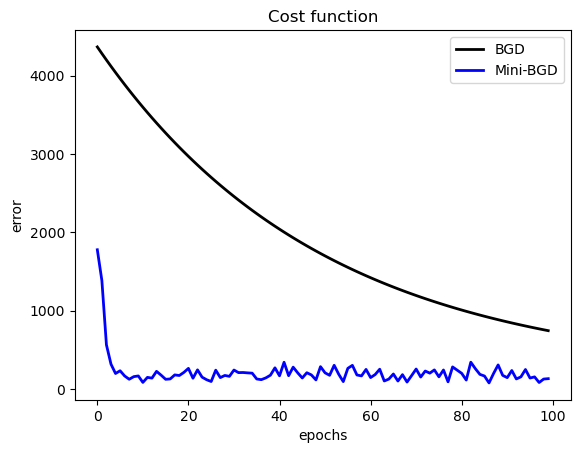

In [252]:
print(len(cost_func_batch))
plt.plot(cost_func, linewidth=2,color='black', label='BGD')
plt.plot(cost_func_batch, linewidth=2,color='blue', label='Mini-BGD')
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Cost function')
plt.legend()
plt.show()

In [ ]:
predictions1 = model1.predict(X_data)
print(predictions1)
predictions2 = model2.predict(X_data)
print(predictions2)

[ 1.97933127e+01 -5.38699263e+01  1.85383053e+02  2.77173164e+01
  3.06892318e+01  1.77752038e+01 -1.50095193e+02  1.00007475e+02
  3.38305250e+01  1.23803912e+02  1.16181108e+02 -2.97493843e+01
 -4.48876657e+01  1.03441067e+00  6.97243036e+01 -2.33352055e+01
  5.77763536e+01 -1.64632636e+01 -1.65246109e+02  6.11814041e+01
 -5.81333188e+00  5.04501074e+01 -7.97336712e+01 -3.30280576e+01
  3.09738430e+01 -1.30790493e+02  5.16426558e+01  1.36293896e+02
  1.10009077e+01 -3.06820083e+01  9.52293332e+01  2.16056171e+01
 -1.93589737e+02 -5.31997913e+01 -3.75571181e+01 -3.01196503e+01
  6.81490956e+00  4.49936237e+00  9.91750779e+01 -1.14397186e+02
 -8.25442076e+01  1.13691023e+02 -1.23424367e+02 -1.50645949e+02
 -6.71656375e+01 -1.04483876e+02  4.11970543e+01 -1.49083811e+02
  1.34012464e+01 -5.12083379e+01  1.73137307e+02  1.06799440e+02
 -1.29133098e+02 -7.21628503e+01 -8.97999531e+01 -5.12547940e+00
 -2.24341803e+01  2.66257976e+01  6.05514972e+01  3.62022772e+01
  2.32115536e+02  1.66222

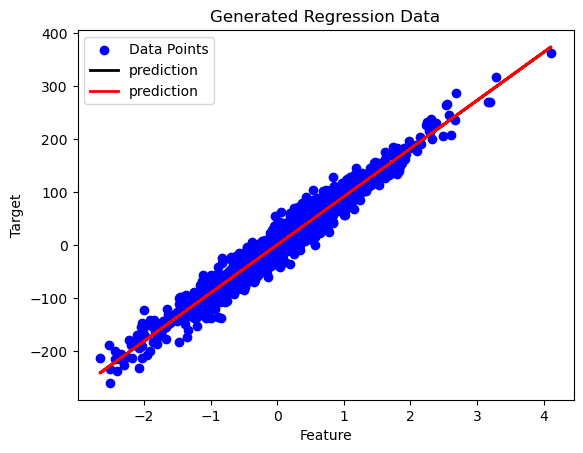

In [ ]:
plt.scatter(X_data, y_points, color='blue', label='Data Points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Generated Regression Data')
plt.plot(X_data, predictions1, linewidth=2,color='black', label='prediction')
plt.plot(X_data, predictions2, linewidth=2,color='red', label='prediction')
plt.legend()
plt.show()

## Model notes
The model is trained with X data and the derivative of the gradient is used to find the optimal weight and bias which allows for fitting over given data. Choose a some amount of learning rate (0.01 in this case), and see how different learning rates might affect and lead to underfittiing and overfitting. Also pay attention to batch size and make sure its not too little to avoid large fluctuations in cost